In [1]:
from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVC, SVR
import plotly.express as px
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt



In [2]:

df = pd.read_excel("/Users/ale/Desktop/ML/Historical Series Case Study LUISS (2).xlsx", sheet_name='IBM')
df.head()
df.columns

df = df.iloc[:,:2]
df.columns=['IBM DAILY DATA','Price close']
df = df.drop(0, axis=0)
df['Price close']=df['Price close'].astype('float')





In [3]:
# split into train and test 
df_train=df[:4000]
df_train=df_train.dropna()
df_test=df[4000:]
df_test=df_test.dropna()

def df_to_X_y(df,windowsize=30):
    df_as_np = df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+windowsize]
        y.append(label)
    return np.array(X), np.array(y)
Close = df['Price close']
WINDOWSIZE = 30
X,y = df_to_X_y(Close, WINDOWSIZE)
Close.shape, X.shape, y.shape

df_train, X_train, y_train = df["Price close"].index[:4000], X[:4000], y[:4000]
df_test, X_test, y_test = df["Price close"].index[4000:], X[4000:], y[4000:]

In [4]:
X_train.shape


(4000, 30, 1)

In [5]:
X_train = np.reshape(X_train,(4000, 30))


In [6]:
df["Price close"]

1        61.780476
2        66.433693
3        64.178642
4        66.433693
5        65.288307
           ...    
5562    135.606552
5563    135.389175
5564    136.149994
5565    133.520004
5566    132.690002
Name: Price close, Length: 5566, dtype: float64

In [7]:
# design svm model
clf = SVR(kernel="rbf", C=1000.0, degree=3, epsilon=0.1, coef0=1, verbose=2)

# fit model
clf.fit(X_train,y_train)



[LibSVM]

SVR(C=1000.0, coef0=1, verbose=2)

In [8]:
X_test.shape


(1536, 30, 1)

In [9]:
X_test = np.reshape(X_test,(1536, 30))

In [10]:
# make a prediction
predict_y = clf.predict(X_test)
print(predict_y)

yhat = predict_y.reshape(predict_y.shape[0],1)
print(yhat.shape,X_test.shape)


[ 96.21704121  95.7219087   96.69425259 ... 135.290163   136.1152122
 133.85832579]
(1536, 1) (1536, 30)


In [11]:
predict_x = clf.predict(X_train)
print(predict_x)
xhat = predict_x.reshape(predict_x.shape[0],1)


[65.95857185 66.56580771 67.10376664 ... 98.54092002 98.10837402
 97.33880924]


In [12]:
print(df)
prediction_x = pd.DataFrame(predict_x, 
             columns=['Prediction'])
prediction_y = pd.DataFrame(predict_y, 
             columns=['Prediction'])
Prediction=pd.concat([prediction_x,prediction_y], ignore_index=True)
print(Prediction)

           IBM DAILY DATA  Price close
1     1999-12-31 00:00:00    61.780476
2     2000-01-03 00:00:00    66.433693
3     2000-01-04 00:00:00    64.178642
4     2000-01-05 00:00:00    66.433693
5     2000-01-06 00:00:00    65.288307
...                   ...          ...
5562  2022-02-07 00:00:00   135.606552
5563  2022-02-08 00:00:00   135.389175
5564  2022-02-09 00:00:00   136.149994
5565  2022-02-10 00:00:00   133.520004
5566  2022-02-11 00:00:00   132.690002

[5566 rows x 2 columns]
      Prediction
0      65.958572
1      66.565808
2      67.103767
3      66.511218
4      66.687531
...          ...
5531  135.103283
5532  135.519942
5533  135.290163
5534  136.115212
5535  133.858326

[5536 rows x 1 columns]


In [13]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predict_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.855


In [14]:
# calculate MAPE
mape = np.mean(np.fabs((y_test - predict_y ) / y_test)) * 100
print('Test mape: %d' % mape)


Test mape: 1


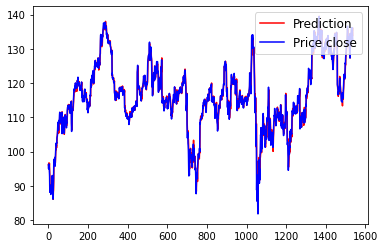

In [15]:
# plot 
pyplot.plot([x for x in range(1, predict_y.shape[0]+1)], predict_y, linestyle='-', color='red', label='Prediction')
pyplot.plot([x for x in range(1, y_test.shape[0]+1)], y_test, linestyle='-', color='blue', label='Price close')
pyplot.legend(loc=1, prop={'size': 12})
pyplot.show()

In [16]:
dff_pred=df.assign(Prediction=pd.concat([prediction_x,prediction_y], ignore_index=True))
dff_pred.drop(dff_pred.tail(31).index, inplace=True)
print(dff_pred)


           IBM DAILY DATA  Price close  Prediction
1     1999-12-31 00:00:00    61.780476   66.565808
2     2000-01-03 00:00:00    66.433693   67.103767
3     2000-01-04 00:00:00    64.178642   66.511218
4     2000-01-05 00:00:00    66.433693   66.687531
5     2000-01-06 00:00:00    65.288307   65.038529
...                   ...          ...         ...
5531  2021-12-22 00:00:00   128.205688  135.103283
5532  2021-12-23 00:00:00   129.075226  135.519942
5533  2021-12-27 00:00:00   130.053436  135.290163
5534  2021-12-28 00:00:00   131.051422  136.115212
5535  2021-12-29 00:00:00   131.762848  133.858326

[5535 rows x 3 columns]


In [17]:
prezzo = []
for i in dff_pred['Price close']:
    prezzo.append(i)
strategy_act=[]
i=1
while i < len(prezzo):
    if prezzo[i]>prezzo[i-1]:
        strategy_act.append(1)
    else:
        strategy_act.append(0)
    i=i+1
prezzo_pre = []
for i in dff_pred['Prediction']:
    prezzo_pre.append(i)
    
strategy_pre=[]
i=1
while i < len(prezzo_pre):
    if prezzo_pre[i]>prezzo_pre[i-1]:
        strategy_pre.append(1)
    else:
        strategy_pre.append(0)
    i=i+1
test_results = dff_pred.iloc[1:]
test_results.reset_index(inplace=True,drop=True)
test_results['Strategy Pre'] = np.array(strategy_pre)
print(test_results)

           IBM DAILY DATA  Price close  Prediction  Strategy Pre
0     2000-01-03 00:00:00    66.433693   67.103767             1
1     2000-01-04 00:00:00    64.178642   66.511218             0
2     2000-01-05 00:00:00    66.433693   66.687531             1
3     2000-01-06 00:00:00    65.288307   65.038529             0
4     2000-01-07 00:00:00    65.001938   63.730684             0
...                   ...          ...         ...           ...
5529  2021-12-22 00:00:00   128.205688  135.103283             0
5530  2021-12-23 00:00:00   129.075226  135.519942             1
5531  2021-12-27 00:00:00   130.053436  135.290163             0
5532  2021-12-28 00:00:00   131.051422  136.115212             1
5533  2021-12-29 00:00:00   131.762848  133.858326             0

[5534 rows x 4 columns]


<ipython-input-17-f8705c53e10e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['Strategy Pre'] = np.array(strategy_pre)


In [18]:
import pandas_datareader as web
df = pd.DataFrame(web.DataReader('IBM',data_source='yahoo',start='2000-01-03', end='2021-12-29'))

df.reset_index(inplace=True)
df["Date"]=pd.to_datetime(df["Date"])
test_results["IBM DAILY DATA"]=pd.to_datetime(test_results["IBM DAILY DATA"])

mergedRes = pd.merge(test_results, df,left_on ='IBM DAILY DATA', right_on ="Date")

mergedRes.drop(["Date","High","Low","Close","Volume","Adj Close"], axis=1)



<ipython-input-18-42c4f7bf01b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results["IBM DAILY DATA"]=pd.to_datetime(test_results["IBM DAILY DATA"])


,IBM DAILY DATA,Price close,Prediction,Strategy Pre,Open
0,2000-01-03,66.433693,67.103767,1,107.492828
1,2000-01-04,64.178642,66.511218,0,108.986618
2,2000-01-05,66.433693,66.687531,1,107.970840
3,2000-01-06,65.288307,65.038529,0,112.810707
4,2000-01-07,65.001938,63.730684,0,112.093689
...,...,...,...,...,...
5529,2021-12-22,128.205688,135.103283,0,129.059998
5530,2021-12-23,129.075226,135.519942,1,130.000000
5531,2021-12-27,130.053436,135.290163,0,130.630005
5532,2021-12-28,131.051422,136.115212,1,131.600006


In [19]:
def apply_strategy(dataframe, target_col, name):
#def apply_strategy(mergedRes, mergedRes["Strategy Pre"], "IBM"):
    
    # Create Long/Short columns
    dataframe["Long"] = np.zeros(len(target_col))
    dataframe["LongPct"] = np.zeros(len(target_col))
    dataframe["Short"] = np.zeros(len(target_col))
    dataframe["ShortPct"] = np.zeros(len(target_col))
    
    # Fill Long/Short columns (1 if Long/Short is open, 0 if it's not, based on target_col prediction)
    
    for i, num in enumerate(target_col):
        try:    
            if num == 1:
                dataframe.Long[i+1] = 1
                dataframe.Short[i+1] = 0
            else:
                dataframe.Long[i+1] = 0
                dataframe.Short[i+1] = 1
        except IndexError:
            break
    
    for i, num in enumerate(dataframe.Long):
        if num == 1:
            dataframe.LongPct[i] = (dataframe.Close[i] - dataframe.Open[i])/dataframe.Open[i]
        else:
            dataframe.LongPct[i] = 0
    for i, num in enumerate(dataframe.Short):
        if num == 1:
            dataframe.ShortPct[i] = ((dataframe.Close[i] - dataframe.Open[i])/dataframe.Open[i])*(-1)
        else:
            dataframe.ShortPct[i] = 0
    
    # Evaluation metrics
    TotLongPct = sum(dataframe["LongPct"])
    TotShortPct = sum(dataframe["ShortPct"])
    TotReturnPct = round(TotLongPct + TotShortPct, 2)
    BuyNHoldReturn = round(((dataframe.Close.iloc[-1,] - dataframe.Open.iloc[1,])/dataframe.Open.iloc[1,])*100, 2)

    
    
    # Summary output
    
    print(f"-----------Performance-----------{name}")
    print(f"Trading period: {len(dataframe.index)} days")
    print(f"Net Profit: {TotReturnPct*100}%")
    print(f"Annualized avg return: {(TotReturnPct*100)/len(dataframe.index)*365}%")
    print(f"Buy on 1st day and hold till last day strategy would have returned: {BuyNHoldReturn}%")
    print(f"Result VS buy and hold: {TotReturnPct*100-BuyNHoldReturn}%")

In [20]:
apply_strategy(mergedRes, mergedRes["Strategy Pre"], "IBM")


<ipython-input-19-240a271aa21a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.Long[i+1] = 1
<ipython-input-19-240a271aa21a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.Short[i+1] = 0
<ipython-input-19-240a271aa21a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.Long[i+1] = 0
<ipython-input-19-240a271aa21a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

-----------Performance-----------IBM
Trading period: 5534 days
Net Profit: -80.0%
Annualized avg return: -5.276472714130827%
Buy on 1st day and hold till last day strategy would have returned: 22.35%
Result VS buy and hold: -102.35%
